# Data Analysis Using Twitter API

For the purpose of working with the Twitter API, I'll be using the "tweepy" library in Python (http://www.tweepy.org/).

I have added comments throughout the code (wherever required) so as to make it easier to understand. I'll be using "pandas" library in Python (http://pandas.pydata.org/) to convert the returned JSON format into a DataFrame to work on it and analyze it.

## Step 1: Getting Twitter API keys
In order to access Twitter  API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret. Follow the steps below to get all 4 elements:

*   Create a twitter account if you do not already have one.
*   Go to https://apps.twitter.com/ and log in with your twitter credentials.
*   Click "Create New App"
*   Fill out the form, agree to the terms, and click "Create your Twitter application"
*   In the next page, click on "API keys" tab, and copy your "API key" and "API secret".
*   Scroll down and click "Create my access token", and copy your "Access token" and "Access token secret".


In [16]:
#Import the required libraries
import tweepy
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.mpl_style', 'default')


/home/vulture/anaconda/conda/envs/dato-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Step 2: Connecting to Twitter Streaming API
Twitter requires all requests to use OAuth for authentication.
We will assign the keys to respective variables for use, and also connect to the Twitter API using these along-with "tweepy". 

In [2]:
consumer_key =  '<Your Consumer Key>'
consumer_secret = '<Your Consumer secret Key>'
access_token = '<Your Access Token>'
access_token_secret = '<Your Access Token Secret>'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


## Step 3: Find trend 
Define a function to get a trend with rank(N) for specific WOEID (a Yahoo! Where On Earth ID)


In [3]:
#We print data first and go through it 
print api.trends_place(id = 23424977)

[{u'created_at': u'2016-04-29T18:42:57Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23InternationalDanceDay', u'query': u'%23InternationalDanceDay', u'tweet_volume': 49414, u'name': u'#InternationalDanceDay', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23FridayFeeling', u'query': u'%23FridayFeeling', u'tweet_volume': 65800, u'name': u'#FridayFeeling', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23ArborDay', u'query': u'%23ArborDay', u'tweet_volume': 13902, u'name': u'#ArborDay', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23SongAnArtist', u'query': u'%23SongAnArtist', u'tweet_volume': None, u'name': u'#SongAnArtist', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23FlashbackFriday', u'query': u'%23FlashbackFriday', u'tweet_volume': 12270, u'name': u'#FlashbackFriday', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%22Mike+Pence%22', u'query': u'%22Mike+Pence%22', u

## We understand from data above that api.trends_place() returns a list contains only one item and this item is in JSON format .
## Second key in JSON object is 'trends' and it is a list of all_trends exist 

In [4]:
#by default N=1
def Get_Trend(N=0,id = 23424977): 
    # WOEID = 23424977 ==> US
    trends =  api.trends_place(id)
    json_data = trends[0]             #the first item(the only item) 
    all_trends = json_data['trends']  #list of all trends 
    trend_N = all_trends[N]           #trend N
    return trend_N['query']           #query name ,so it will be easy to serch for! 


## Step 4: Download the data in that trend
We can get a good amount of data to use it for the purpose of analysis.For this I'll download first 1000 tweet based on  search query(trend_N)
* Note : it may take a while

In [10]:
results = []

#Get the first 1000 items based on the search query(trend_1)
for tweet in tweepy.Cursor(api.search, q=str(Get_Trend(0,23424977))).items(1000):
    results.append(tweet)

# Verify the number of items returned
print len(results)
#Trend name, %23 for #
print str(Get_Trend(0,23424977))

1000
%23InternationalDanceDay


## Step 5: Manipulate the data
Now I have my data, but as it is in JSON format it will be somewhat hard to utilize for data analysis. We have to separate out only the data which is required for the analysis. 
To do so, we'll use the pandas library of Python

In [11]:
def toDataFrame(tweets):
# Create a function to convert a given list of tweets into a Pandas DataFrame.

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    DataSet['userLanguage'] = [tweet.user.lang for tweet in tweets]
    return DataSet

In [12]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)
#Visualize 
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,userLanguage
0,726124965913878529,Happy #InternationalDanceDay 💃💃❤❤,0,0,Twitter for Android,2016-04-29 19:04:17,2631778625,dina_aldrich,Dina,2014-06-22 16:24:37,,288,259,England,None,en-gb
1,726124963665743872,RT @Blizzard_Ent: #InternationalDanceDay?! Yes...,26,0,Twitter Web Client,2016-04-29 19:04:16,396983660,NuevoTristan,Nuevo Tristan,2011-10-24 02:14:21,Primer fansite oficial de Diablo 3 en Chile y ...,918,161,"Santiago, Chile",Santiago,es
2,726124962680070145,RT @BFI: The bank holiday #FridayFeeling on #I...,42,0,Twitter for Android,2016-04-29 19:04:16,3089650444,NAlterra,N.Berthworth,2015-03-12 18:46:04,"make-up artist, hairstylist for theatre and ad...",136,457,"London, England",None,de
3,726124962612830208,RT @CMitch3505: #InternationalDanceDay Dawgs a...,25,0,Twitter for iPhone,2016-04-29 19:04:16,912459750,OliviaHermann,Olivia Hermann,2012-10-29 13:41:01,UW | ΚΚΓ,544,189,University of Washington,None,en
4,726124958921838593,RT @littleBits: Need a dancing partner? Turn u...,2,0,Twitter Web Client,2016-04-29 19:04:15,12021482,RemixCity,RemixCity,2008-01-09 11:02:18,Blazing Music Nonstop! Entrepreneur + Engineer...,882,2707,Miami Houston NYC | JAMAICA,Eastern Time (US & Canada),en


## Step 6: Clean the data 
This step is required so that we only use valid values/records in our data and neglect the invalid values/records as they don't have any significance and also so that they don't have any negative impact on our results or analysis

In [13]:
DataSet = DataSet[DataSet.userTimezone.notnull()]
len(DataSet)

575

In [14]:
# Count the number of tweets in each time zone and get the first 10
timezone_count = DataSet['userTimezone'].value_counts()[:10]
print timezone_count

Pacific Time (US & Canada)     123
Eastern Time (US & Canada)     109
Central Time (US & Canada)      59
London                          40
Quito                           19
Atlantic Time (Canada)          17
Arizona                         17
Mountain Time (US & Canada)     12
Athens                          12
Buenos Aires                    12
Name: userTimezone, dtype: int64


## Step 7: Data visualization
These top 10 are shown in the table format above. But a table is not always a good way of representing data, so we'll plot this data on a bar-graph to make it more presentable and understanding to the users

/home/vulture/anaconda/conda/envs/dato-env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


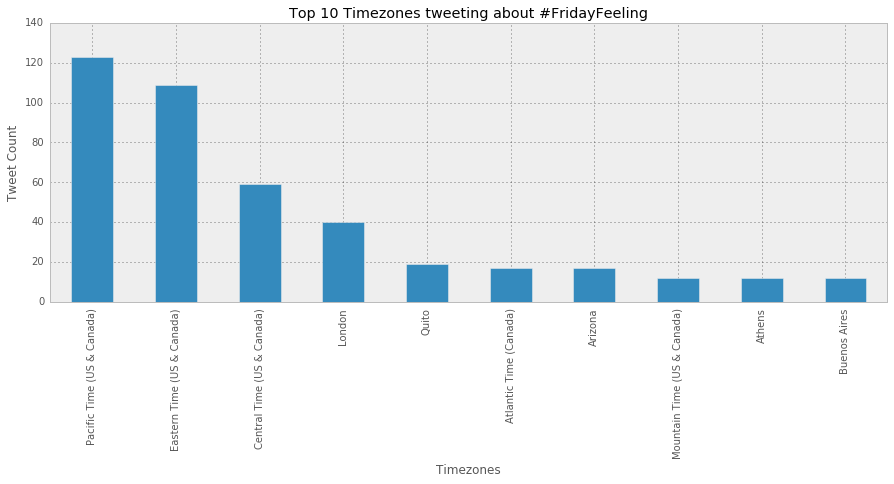

In [17]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
timezone_count.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #FridayFeeling')


In [18]:
DataSet = DataSet[DataSet.userLanguage.notnull()]
len(DataSet)

575

In [19]:
# Count the number of tweets for each language and get the first 4
language_count = DataSet['userLanguage'].value_counts()[:4]
language_count

en    445
es     56
pt     16
fr     12
Name: userLanguage, dtype: int64

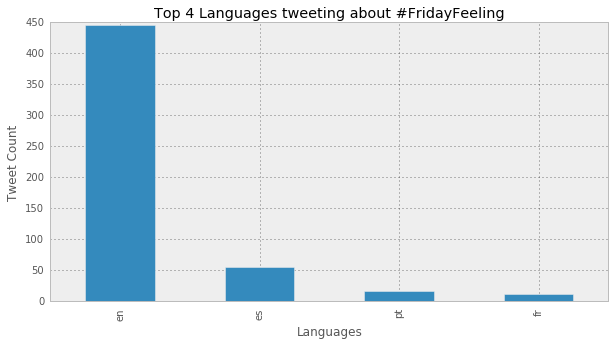

In [20]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (10, 5)

# Plot the language data as a bar-graph
language_count.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Languages')
plt.ylabel('Tweet Count')
plt.title('Top 4 Languages tweeting about #FridayFeeling')


This make sense because we are interestesd only in US trend

# Another application 
We will analyse data in 4th trend in "Worldwide"

In [33]:
results = []

#Get the first 1000 items based on the search query(trend_1)
for tweet in tweepy.Cursor(api.search, q=str(Get_Trend(3,1))).items(1000):
    results.append(tweet)

# Verify the number of items returned
print len(results)
#Trend name, %23 for #
print str(Get_Trend(3,1))

1000
%23PSGSRFC


In [34]:
#Pass the tweets list to the above function to create a DataFrame
DataSet2 = toDataFrame(results)
#Visualize 
DataSet2.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,userLanguage
0,726149052790915073,RT @PSG_inside: La célébration de @Ibra_offici...,207,0,Twitter for iPhone,2016-04-29 20:40:00,704667131712032768,SolinsonLoulie,Soldy,2016-03-01 13:58:31,"David Luiz, Zlatan, Gigi, PSG, Juventus ⚽️ 1D,...",160,380,On the road again,None,en
1,726149049699672065,RT @PSG_inside: 56' Le @PSG_inside mène 2-0 fa...,209,0,Twitter for iPad,2016-04-29 20:39:59,3973899095,DavidLafargePok,Louis,2015-10-16 18:31:47,,56,174,,None,fr
2,726149044507172864,RT @PSG_inside: Gooooooooooooooooooooooooooaaa...,362,0,Twitter for iPhone,2016-04-29 20:39:58,128658626,johafonso,Joh,2010-04-01 20:11:35,- Insta: johafonso | #Football ⚽️,573,278,,Greenland,fr
3,726149037246799876,RT @le_Parisien_PSG: Sylvain Armand sort sous ...,51,0,Twitter for iPhone,2016-04-29 20:39:56,327656616,NeoZlatan,Mr Mayor,2011-07-01 22:49:33,Ma vie a changé depuis le jour où j'ai rencont...,589,303,Dans Un Univers Parallèle,Paris,fr
4,726149036097568768,RT @YonKab64: Défaite 4-0 des hommes de Courbi...,34,0,Twitter for Android,2016-04-29 20:39:56,378199424,SarahEstrozizi,Sarah Estrozizi,2011-09-22 20:15:07,Eric Cartman au féminin avec un maillot phocéen.,1942,287,Avignon,Paris,fr


In [35]:
timezone2 = DataSet2[DataSet2.userTimezone.notnull()]
len(timezone2)

515

In [36]:
# Count the number of tweets in each time zone and get the first 10
timezone_count2 = timezone2['userTimezone'].value_counts()[:10]
print timezone_count2

Paris                         186
Pacific Time (US & Canada)     81
Athens                         78
Amsterdam                      68
Ljubljana                      15
Greenland                      14
Belgrade                        9
Hawaii                          9
Brasilia                        5
Madrid                          4
Name: userTimezone, dtype: int64


In [37]:
language_data2 = DataSet2[DataSet.userLanguage.notnull()]
len(language_data2)

1000

In [38]:
# Count the number of tweets for each language and get the first 4
language_count2 = DataSet2['userLanguage'].value_counts()[:4]
language_count2

fr    867
en     94
es     13
pt      8
Name: userLanguage, dtype: int64

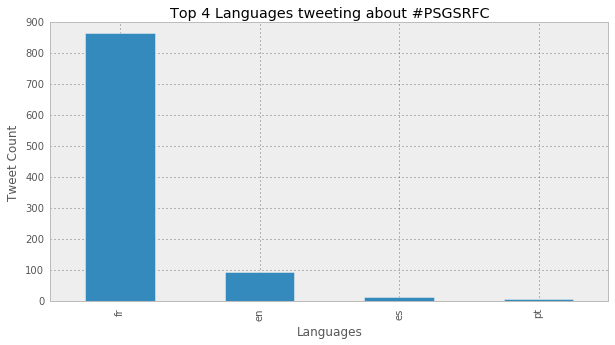

In [39]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (10, 5)

# Plot the Language data as a bar-graph
language_count2.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Languages')
plt.ylabel('Tweet Count')
plt.title('Top 4 Languages tweeting about #PSGSRFC')


# The French champions cruised to victory at Parc des Princes 
## PSG - SRFC
##    4     -    0 

Goals scored by:

* Ibrahimovic 2-goals
* Maxwell
* Cavani

Our main goal in this text mining task is: compare the popularity of 3 players this day 

First, we will create a function that checks if a specific keyword is present in a text. We will do this by using regular expressions. Python provides a library for regular expression called re.

In [40]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False


In [41]:
DataSet2['Ibrahimovic'] = DataSet2['tweetText'].apply(lambda tweet: word_in_text('Ibrahimovic', tweet))

In [42]:
DataSet2['Maxwell'] = DataSet2['tweetText'].apply(lambda tweet: word_in_text('Maxwell', tweet))

In [48]:
DataSet2['Cavani'] = DataSet2['tweetText'].apply(lambda tweet: word_in_text('Cavani', tweet))

In [49]:
DataSet2.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,userLanguage,Ibrahimovic,Maxwell,Cavani
0,726149052790915073,RT @PSG_inside: La célébration de @Ibra_offici...,207,0,Twitter for iPhone,2016-04-29 20:40:00,704667131712032768,SolinsonLoulie,Soldy,2016-03-01 13:58:31,"David Luiz, Zlatan, Gigi, PSG, Juventus ⚽️ 1D,...",160,380,On the road again,None,en,False,False,False
1,726149049699672065,RT @PSG_inside: 56' Le @PSG_inside mène 2-0 fa...,209,0,Twitter for iPad,2016-04-29 20:39:59,3973899095,DavidLafargePok,Louis,2015-10-16 18:31:47,,56,174,,None,fr,False,False,False
2,726149044507172864,RT @PSG_inside: Gooooooooooooooooooooooooooaaa...,362,0,Twitter for iPhone,2016-04-29 20:39:58,128658626,johafonso,Joh,2010-04-01 20:11:35,- Insta: johafonso | #Football ⚽️,573,278,,Greenland,fr,False,False,True
3,726149037246799876,RT @le_Parisien_PSG: Sylvain Armand sort sous ...,51,0,Twitter for iPhone,2016-04-29 20:39:56,327656616,NeoZlatan,Mr Mayor,2011-07-01 22:49:33,Ma vie a changé depuis le jour où j'ai rencont...,589,303,Dans Un Univers Parallèle,Paris,fr,False,False,False
4,726149036097568768,RT @YonKab64: Défaite 4-0 des hommes de Courbi...,34,0,Twitter for Android,2016-04-29 20:39:56,378199424,SarahEstrozizi,Sarah Estrozizi,2011-09-22 20:15:07,Eric Cartman au féminin avec un maillot phocéen.,1942,287,Avignon,Paris,fr,False,False,False


In [50]:
print DataSet2['Ibrahimovic'].value_counts()[True]
print DataSet2['Maxwell'].value_counts()[True]
print DataSet2['Cavani'].value_counts()[True]


37
212
222


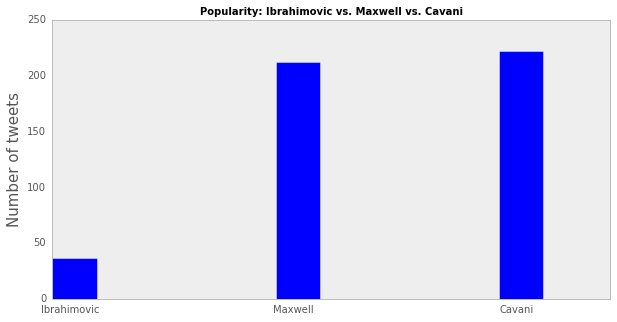

In [63]:
players = ['Ibrahimovic','Maxwell','Cavani']
tweets_count = [ DataSet2['Ibrahimovic'].value_counts()[True],
                 DataSet2['Maxwell'].value_counts()[True],
                 DataSet2['Cavani'].value_counts()[True] ]


x_pos = list(range(len(players)))
width = 0.2
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_count, width, alpha=1, color='b')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Popularity: Ibrahimovic vs. Maxwell vs. Cavani', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(players)
plt.grid()


# Analysis
The most popular player this day is Cavani then Maxwell. 
Despite Ibrahimovic scored 2 goals ,but he mentioned only in less than 50 tweets.